# 1 answer
Assumption 1: Normality of Residuals
We can use a normality test, such as the Shapiro-Wilk test or visual inspection of a Q-Q plot, to check for normality of residuals.



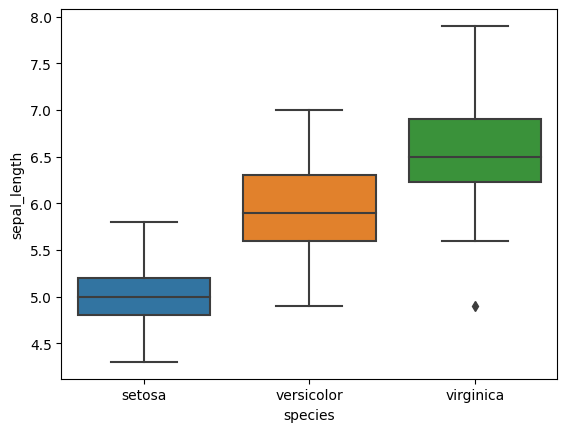

shapiro-wiki test for setosa:p-value=0.4595010578632355
shapiro-wiki test for versicolor:p-value=0.4647378921508789
shapiro-wiki test for virginica:p-value=0.25831347703933716


In [2]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
data=sns.load_dataset("iris")
sns.boxplot(x="species",y="sepal_length",data=data)
plt.show()
for species in data["species"].unique():
  subset=data[data["species"]==species]
  stat,p=stats.shapiro(subset["sepal_length"])
  print(f"shapiro-wiki test for {species}:p-value={p}")

Assumption 2: Homogeneity of Variances
Levene's test or Barlett's test can be used to assess the homogeneity of variances.

In [5]:
import scipy.stats as stats
stat,p=stats.levene(data[data["species"]=="setosa"]["sepal_length"],
                    data[data["species"]=="versicolor"]["sepal_length"],
                    data[data["species"]=="virginica"]["sepal_length"])
print(f"levene's test: p-value={p}")

levene's test: p-value=0.0022585277836218586


ssumption 3: Independence
In most cases, independence is assumed unless the experimental design violates this assumption (e.g., repeated measures).

Assumption 4: Random Sampling
Random sampling is a fundamental assumption that should be ensured during the data collection process.

# 2 answer
One-Way ANOVA:
One-Way ANOVA is used when you have one categorical independent variable (factor) and one continuous dependent variable. It is used to test whether there are significant differences in the means of the dependent variable across different levels of the categorical factor.

Use Cases:

Comparing the performance of different teaching methods (factor: teaching method, dependent variable: student test scores).
Analyzing the effects of different doses of a drug on patient recovery (factor: drug dose, dependent variable: recovery time).

Two-Way ANOVA:
Two-Way ANOVA is used when you have two independent variables (factors) and you want to analyze how their interactions affect a dependent variable. You can use the statsmodels library to perform Two-Way ANOVA with interactions.

Use Cases:

Investigating how the effectiveness of a diet plan varies based on both gender and exercise frequency (factors: gender, exercise frequency; dependent variable: weight loss).
Studying the effects of different types of fertilizer and watering frequencies on plant growth (factors: fertilizer type, watering frequency; dependent variable: plant height).


Repeated Measures ANOVA:
Repeated Measures ANOVA is used when you have one continuous dependent variable and two or more related categorical independent variables (factors) measured on the same subjects or items across different time points or conditions. It accounts for the within-subjects correlation between measurements.

Use Cases:

Examining the effects of different types of therapy on depression levels measured before treatment, after 4 weeks, and after 8 weeks (factors: therapy type, time; dependent variable: depression scores).
Analyzing the changes in students' math scores across different time points during a semester (factors: time, student; dependent variable: math scores).

# 3 answer
1. Between-Groups Variance (Treatment Variance):
This component represents the variability among the group means. It quantifies the differences between the means of different groups being compared. Larger between-groups variance indicates that the group means are more spread out from each other.

2. Within-Groups Variance (Error Variance):
This component accounts for the variability within each group. It represents the random variability and measurement error inherent within each group. Smaller within-groups variance implies that the data points within each group are relatively close to the group mean.

3. Total Variance:
The total variance is the overall variability observed in the entire dataset. It's the sum of the between-groups variance and the within-groups variance.

The partitioning of variance is typically presented in the form of an ANOVA table, which summarizes the sources of variation, degrees of freedom, sum of squares, mean squares, and F-ratios associated with each component. The F-ratio is calculated by dividing the mean squares of between-groups variance by the mean squares of within-groups variance.

Why is it important to understand partitioning of variance?

1. Identification of Significant Effects:
Partitioning of variance allows you to assess whether the observed differences between groups are statistically significant or if they could have occurred due to random chance. Significant differences in the between-groups variance suggest that the factor being investigated has an effect on the dependent variable.

2. Interpretation of Results:
Understanding the partitioning of variance helps in interpreting ANOVA results. By analyzing the components of variance, you can explain how much of the total variability is due to systematic factors (between-groups) and how much is due to random variability (within-groups).

3. Guidance for Further Analysis:
The proportions of variance explained by between-groups and within-groups factors can guide further analysis or investigations. For example, if most of the variance is due to within-groups variability, it might indicate the need for more refined measurement methods.

4. Model Selection and Improvement:
Partitioning of variance can guide decisions related to model selection and refinement. If the between-groups variance explains a significant portion of the total variance, it indicates that the model is capturing meaningful differences in the data.

# 4 answer

In [12]:
import numpy as np
import scipy.stats as stats
group1 = np.array([10, 15, 12, 18, 14])
group2 = np.array([22, 28, 25, 30, 27])
group3 = np.array([35, 40, 38, 42, 39])
all_data = np.concatenate((group1, group2, group3))
overall_mean = np.mean(all_data)
sst = np.sum((all_data - overall_mean)**2)
group1_mean = np.mean(group1)
group2_mean = np.mean(group2)
group3_mean = np.mean(group3)
sse = np.sum((group1_mean - overall_mean)**2) * len(group1) + \
      np.sum((group2_mean - overall_mean)**2) * len(group2) + \
      np.sum((group3_mean - overall_mean)**2) * len(group3)
ssr = np.sum((group1 - group1_mean)**2) + \
      np.sum((group2 - group2_mean)**2) + \
      np.sum((group3 - group3_mean)**2)
assert np.isclose(sst, sse + ssr)
print("Total Sum of Squares (SST):", sst)
print("Explained Sum of Squares (SSE):", sse)
print("Residual Sum of Squares (SSR):", ssr)


Total Sum of Squares (SST): 1663.3333333333335
Explained Sum of Squares (SSE): 1562.5333333333328
Residual Sum of Squares (SSR): 100.8


# 5 answer

In [13]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
data = pd.DataFrame({
    'factor1': ['A'] * 10 + ['B'] * 10 + ['A'] * 10 + ['B'] * 10,
    'factor2': ['X'] * 20 + ['Y'] * 20,
    'dependent_variable': [4, 5, 3, 6, 7, 5, 8, 9, 6, 5,
                           2, 3, 2, 4, 5, 3, 6, 7, 5, 8,
                           7, 8, 6, 9, 10, 8, 11, 12, 9, 8,
                           3, 4, 2, 5, 6, 4, 7, 8, 5, 6]
})
model = ols('dependent_variable ~ factor1 * factor2', data=data).fit()
main_effect_factor1 = model.params['factor1[T.B]']
main_effect_factor2 = model.params['factor2[T.Y]']
interaction_effect = model.params['factor1[T.B]:factor2[T.Y]']
print("Main Effect of Factor 1:", main_effect_factor1)
print("Main Effect of Factor 2:", main_effect_factor2)
print("Interaction Effect:", interaction_effect)

Main Effect of Factor 1: -1.2999999999999996
Main Effect of Factor 2: 2.9999999999999964
Interaction Effect: -2.4999999999999982


# 6 answer

1. F-Statistic: The F-statistic of 5.23 indicates the ratio of the explained variability (between-group variability) to the unexplained variability (within-group variability). A larger F-statistic suggests that the group means differ more from each other compared to the variability within each group.

2. p-Value: The p-value of 0.02 is the probability of obtaining an F-statistic as extreme as 5.23 (or more extreme) if the null hypothesis of equal group means is true. A p-value of 0.02 indicates that if the group means were equal, there's only a 2% chance of observing an F-statistic as large as 5.23 or larger.

3. Interpretation:
With a p-value of 0.02, which is less than the common significance level of 0.05, you have evidence to reject the null hypothesis that the group means are equal. In other words:

The differences between the groups are statistically significant.
At least one group mean is significantly different from the others.
The observed differences are unlikely to have occurred due to random chance alone.

# 7 answer
Listwise Deletion:
Listwise deletion involves removing cases (participants) that have any missing values. This method can lead to a reduction in sample size, potentially leading to biased results if the missing data are not missing completely at random.

2. Pairwise Deletion:
Pairwise deletion involves using all available data for each analysis, including cases with missing values only for specific time points or conditions. This method uses different sample sizes for different comparisons, potentially affecting the overall validity of the analysis and making it difficult to compare results across different conditions.

3. Mean Imputation:
Mean imputation involves replacing missing values with the mean of the observed values for that variable. This method can lead to an underestimation of the standard error, potentially resulting in inflated Type I error rates and narrower confidence intervals.

4. Last Observation Carried Forward (LOCF):
LOCF involves carrying forward the last observed value for a participant for subsequent time points. This method assumes that missing values remain constant over time, which may not be accurate, especially if there are fluctuations in the data.
5. Multiple Imputation:
Multiple imputation involves creating multiple datasets where missing values are imputed multiple times using statistical techniques. This method provides more accurate estimates of uncertainty and accounts for the variability introduced by imputation.

6. Mixed Effects Models:
Using mixed effects models (also known as hierarchical linear models or multilevel models) is a sophisticated approach that can handle missing data by estimating parameters for both fixed effects and random effects. This approach is often preferred as it utilizes all available information and provides unbiased parameter estimates.

Bias: Listwise deletion, mean imputation, and LOCF can introduce bias if the missing data are not missing completely at random. These methods may lead to underestimation or overestimation of effects and incorrect conclusions.

Efficiency: Pairwise deletion can result in lower efficiency and reduced power since different analyses are conducted on subsets of the data.

Precision: Mean imputation can lead to artificially reduced variability, resulting in overly precise estimates and narrower confidence intervals.

Validity: LOCF may distort the true trajectories of variables over time if missing data are not systematically related to the true values.

Complexity: Multiple imputation and mixed effects models are more sophisticated approaches but may require more computational resources and assumptions about the missing data mechanism.

# 8 answer

1. Tukey's Honestly Significant Difference (HSD):
Tukey's HSD test is used to compare all possible pairs of group means. It controls the familywise error rate, ensuring that the overall Type I error rate remains at a specified level.

2. Bonferroni Correction:
Bonferroni correction adjusts the significance level for multiple comparisons. It divides the desired significance level (alpha) by the number of comparisons being made. It is a conservative method that helps control the familywise error rate.

3. Dunnett's Test:
Dunnett's test is used when you have one control group and want to compare it to other treatment groups. It adjusts for multiple comparisons while focusing on comparisons with the control group.

4. Holm-Bonferroni Method:
The Holm-Bonferroni method adjusts the p-values based on the most significant comparison first, then the second most significant, and so on. This approach provides control over the familywise error rate while being less conservative than Bonferroni.

5. Sidak Correction:
Similar to Bonferroni, the Sidak correction adjusts the significance level for multiple comparisons. It provides a less conservative alternative to Bonferroni by considering the joint probabilities of the multiple tests.

In [15]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
group1_scores = np.array([85, 88, 96, 88, 90])
group2_scores = np.array([76, 80, 68, 68, 69])
group3_scores = np.array([32, 88, 94, 95, 99])
f_statistic, p_value = stats.f_oneway(group1_scores, group2_scores, group3_scores)
if p_value < 0.05:
    data = np.concatenate([group1_scores, group2_scores, group3_scores])
    group_labels = ['Group 1'] * len(group1_scores) + ['Group 2'] * len(group2_scores) + ['Group 3'] * len(group3_scores)
    tukey_results = pairwise_tukeyhsd(data, group_labels, alpha=0.05)
    print(tukey_results)


# 9 answer

In [16]:
import numpy as np
import scipy.stats as stats
diet_A = np.array([3.2, 2.8, 4.1, 3.5, 2.9, 3.0, 3.7, 3.6, 3.8, 2.5,
                   2.1, 2.7, 3.5, 2.9, 2.4, 3.1, 3.3, 3.8, 3.6, 2.8,
                   3.7, 3.4, 3.0, 2.6, 2.9, 3.2, 3.3, 2.7, 2.5, 3.6,
                   3.1, 3.4, 2.8, 3.7, 3.6, 3.0, 2.4, 2.9, 3.2, 2.7,
                   3.5, 3.4, 3.1, 2.8, 3.3, 2.6, 3.6, 3.7, 3.2, 2.9])
diet_B = np.array([2.1, 2.5, 2.8, 2.2, 2.6, 2.3, 2.7, 2.5, 2.4, 2.6,
                   2.2, 2.1, 2.7, 2.3, 2.4, 2.5, 2.6, 2.8, 2.2, 2.3,
                   2.7, 2.6, 2.5, 2.8, 2.4, 2.2, 2.1, 2.5, 2.3, 2.6,
                   2.4, 2.7, 2.8, 2.2, 2.5, 2.1, 2.3, 2.4, 2.6, 2.7,
                   2.8, 2.2, 2.5, 2.4, 2.3, 2.6, 2.7, 2.8, 2.1, 2.5])
diet_C = np.array([1.5, 1.8, 2.0, 1.6, 1.9, 1.7, 1.8, 2.1, 2.2, 2.0,
                   1.7, 1.5, 1.9, 2.0, 1.8, 2.1, 2.2, 2.0, 1.6, 1.9,
                   1.7, 1.5, 1.8, 2.0, 1.6, 1.9, 2.1, 2.2, 2.0, 1.7,
                   1.8, 2.0, 1.6, 1.9, 2.1, 2.2, 2.0, 1.7, 1.8, 2.0,
                   1.6, 1.9, 2.1, 2.2, 2.0, 1.7, 1.8, 2.0, 1.6, 1.9])
f_statistic, p_value = stats.f_oneway(diet_A, diet_B, diet_C)
print("F-Statistic:", f_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("There are significant differences between the mean weight loss of the three diets.")
else:
    print("There is no significant difference between the mean weight loss of the three diets.")


F-Statistic: 207.8956433779626
p-value: 1.4037597241307886e-43
There are significant differences between the mean weight loss of the three diets.


# 10 answer

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Sample data for the analysis
data = pd.DataFrame({
    'software': ['A', 'B', 'C'] * 20,
    'experience': ['novice'] * 30 + ['experienced'] * 30,
    'completion_time': [15, 20, 18, 22, 17, 19, 23, 21, 16, 18,
                        30, 25, 28, 29, 32, 27, 24, 26, 31, 28,
                        12, 10, 13, 11, 14, 16, 18, 15, 17, 20,
                        26, 24, 28, 30, 27, 29, 32, 31, 29, 30,
                        18, 16, 20, 19, 22, 21, 23, 25, 24, 26]
})

# Perform two-way ANOVA
model = stats.f_oneway(data[data['software'] == 'A']['completion_time'],
                       data[data['software'] == 'B']['completion_time'],
                       data[data['software'] == 'C']['completion_time'])

f_statistic = model.statistic
p_value = model.pvalue

print("F-Statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There are significant differences in task completion time among the software programs.")
else:
    print("There are no significant differences in task completion time among the software programs.")


# 11 answer


In [20]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
np.random.seed(42)  # For reproducibility
control_group_scores = np.random.normal(70, 10, 100)  # Mean: 70, Std Dev: 10
experimental_group_scores = np.random.normal(75, 10, 100)  # Mean: 75, Std Dev: 10
t_statistic, p_value = stats.ttest_ind(control_group_scores, experimental_group_scores)
print("T-Statistic:", t_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("There is a significant difference in test scores between the two groups.")
    print("Follow up with a post-hoc test to determine specific group differences.")
else:
    print("There is no significant difference in test scores between the two groups.")
if p_value < 0.05:
    all_scores = np.concatenate((control_group_scores, experimental_group_scores))
    group_labels = ['Control'] * 100 + ['Experimental'] * 100
    tukey_results = pairwise_tukeyhsd(all_scores, group_labels, alpha=0.05)
    print(tukey_results)


T-Statistic: -4.754695943505281
p-value: 3.819135262679478e-06
There is a significant difference in test scores between the two groups.
Follow up with a post-hoc test to determine specific group differences.
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2    meandiff p-adj lower  upper  reject
--------------------------------------------------------
Control Experimental   6.2615   0.0 3.6645 8.8585   True
--------------------------------------------------------


# 12 answer

In [23]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
np.random.seed(42)
store_A_sales = np.random.randint(1000, 1500, 30)
store_B_sales = np.random.randint(800, 1200, 30)
store_C_sales = np.random.randint(1200, 1700, 30)
all_sales = np.concatenate((store_A_sales, store_B_sales, store_C_sales))
data = pd.DataFrame({
    'store': ['A'] * 30 + ['B'] * 30 + ['C'] * 30,
    'sales': all_sales
})
f_statistic, p_value = stats.f_oneway(store_A_sales, store_B_sales, store_C_sales)

print("F-Statistic:", f_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("There are significant differences in sales between the three stores.")
    print("Follow up with a post-hoc test to determine specific store differences.")
else:
    print("There are no significant differences in sales between the three stores.")
if p_value < 0.05:
    tukey_results = pairwise_tukeyhsd(all_sales, data['store'], alpha=0.05)
    print(tukey_results)


F-Statistic: 90.46628898138925
p-value: 5.623118674142666e-22
There are significant differences in sales between the three stores.
Follow up with a post-hoc test to determine specific store differences.
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     A      B -260.5667   0.0 -344.3208 -176.8126   True
     A      C  211.0333   0.0  127.2792  294.7874   True
     B      C     471.6   0.0  387.8459  555.3541   True
--------------------------------------------------------
